<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

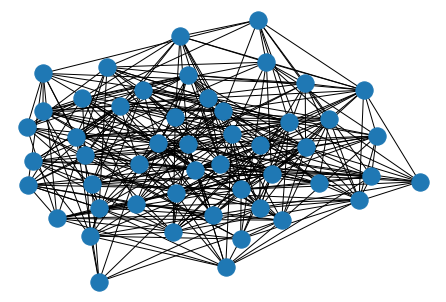

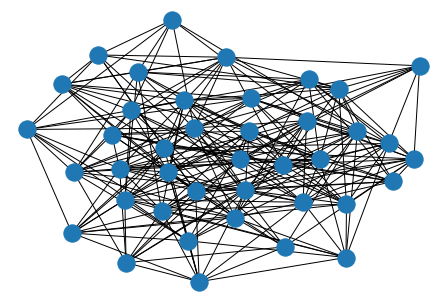

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]]
[[0 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
print(Agent)

{0: [{'State': 0}, {'Home_node': 38}, {'Home_nodeN': [2, 38, 38]}, {'First_node': 35}, {'First_nodeN': [29, 0, 0]}, {'Second_node': 26}, {'Second_nodeN': [22, 37, 37]}, {'Current_node': 38}, {'Current_nodeN': [2, 38, 38]}], 1: [{'State': 0}, {'Home_node': 22}, {'Home_nodeN': [16, 30, 30]}, {'First_node': 10}, {'First_nodeN': [36, 4, 4]}, {'Second_node': 49}, {'Second_nodeN': [30, 16, 16]}, {'Current_node': 22}, {'Current_nodeN': [16, 30, 30]}], 2: [{'State': 0}, {'Home_node': 49}, {'Home_nodeN': [13, 34, 5]}, {'First_node': 23}, {'First_nodeN': [0, 20, 16]}, {'Second_node': 47}, {'Second_nodeN': [37, 13, 13]}, {'Current_node': 49}, {'Current_nodeN': [13, 34, 5]}], 3: [{'State': 0}, {'Home_node': 39}, {'Home_nodeN': [36, 22, 22]}, {'First_node': 3}, {'First_nodeN': [19, 11, 11]}, {'Second_node': 15}, {'Second_nodeN': [10, 20, 20]}, {'Current_node': 39}, {'Current_nodeN': [36, 22, 22]}], 4: [{'State': 0}, {'Home_node': 23}, {'Home_nodeN': [4, 9, 26]}, {'First_node': 18}, {'First_nodeN': 

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      P1 = I1/(I1**2+1)
                      P2 = I2/(I2**2+1)
                      PH = IH/(IH**2+1) 
                      P = P1 + P2 + PH                       
                      #PNN2 = (Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      #PNN3 = (Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      #PNN1 = 1 - PNN2 - PNN3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = (Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = (Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = (Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']**2+1))
                      P = PNN1+PNN2+PNN3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=PNN1/P
                        PNN2=PNN2/P
                        PNN3=PNN3/P
                      #PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341, 3112, 2883, 2667, 2493, 2384, 2311, 2264, 2231, 2213, 2197, 2181, 2121, 2077, 2016, 1964, 1919, 1882, 1857, 1841, 1801, 1771, 1751, 1744, 1735, 1728, 1724, 1716, 1708, 1703, 1701, 1699, 1693, 1692, 1691, 1689, 1684, 1681, 1679, 1674, 1673, 1672, 1671, 1670, 1670, 1670, 1670, 1670, 1670, 1670, 1670]
[195, 462, 807, 1287, 1936, 2787, 3704, 4368, 4719, 4737, 4388, 3763, 2915, 1998, 1307, 956, 859, 984, 1189, 1415, 1631, 1637, 1479, 1286, 1077, 881, 670, 470, 312, 263, 234, 248, 267, 294, 315, 324, 280, 276, 245, 213, 175, 147, 129, 117, 85, 63, 48, 43, 36, 35, 32, 25, 19, 19, 20, 20, 19, 19, 19, 18, 14, 11, 9, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 462, 807, 1287, 1936, 2787, 3704, 4563, 5181, 5544, 5675, 5699, 5702, 5702, 5870, 6137, 6403, 6659, 6888, 7117, 7333, 7507, 7616, 7689, 7736, 7769, 7787, 7803, 7819, 7879, 7923, 7984, 8036, 8081, 8118, 8143, 8159, 8199, 8229, 8249, 82

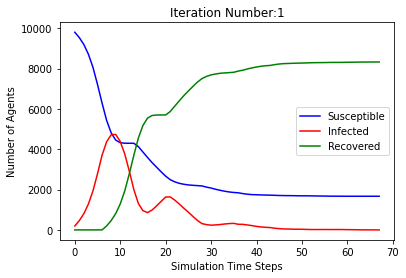

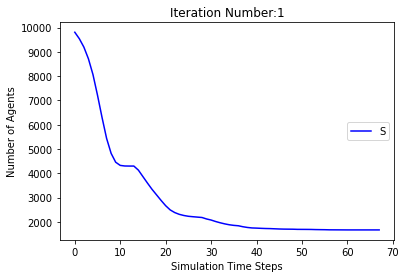

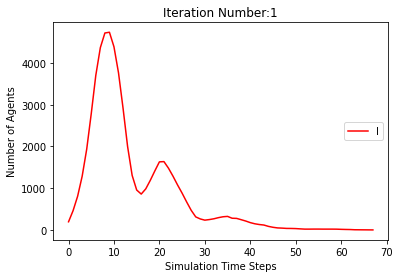

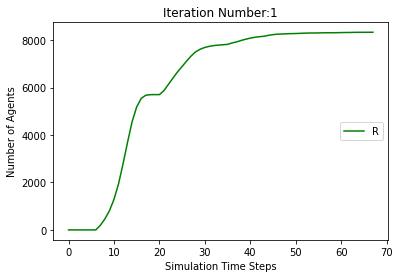

[9805, 9548, 9180, 8662, 7969, 7159, 6337, 5563, 4924, 4547, 4394, 4335, 4317, 4314, 4094, 3561, 3061, 2592, 2163, 1739, 1366, 1085, 907, 827, 768, 731, 689, 646, 607, 576, 539, 517, 500, 491, 484, 474, 468, 463, 460, 452, 450, 449, 448, 448, 448, 448, 448, 448, 448, 448]
[195, 452, 820, 1338, 2031, 2841, 3663, 4242, 4624, 4633, 4268, 3634, 2842, 2023, 1469, 1363, 1486, 1802, 2172, 2578, 2948, 3009, 2654, 2234, 1824, 1432, 1050, 720, 478, 331, 288, 251, 231, 198, 162, 133, 108, 76, 57, 48, 41, 35, 26, 20, 15, 12, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 452, 820, 1338, 2031, 2841, 3663, 4437, 5076, 5453, 5606, 5665, 5683, 5686, 5906, 6439, 6939, 7408, 7837, 8261, 8634, 8915, 9093, 9173, 9232, 9269, 9311, 9354, 9393, 9424, 9461, 9483, 9500, 9509, 9516, 9526, 9532, 9537, 9540, 9548, 9550, 9551, 9552]
[[], [9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341, 3112, 2883, 2667, 2493, 2384, 2311, 2264, 2231, 2213, 2197, 2181, 2121, 2077, 

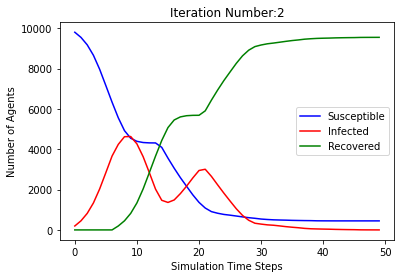

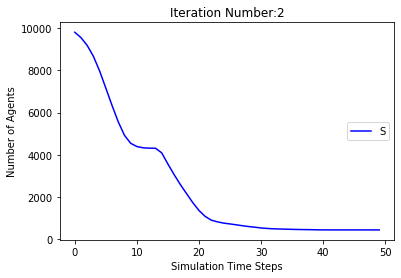

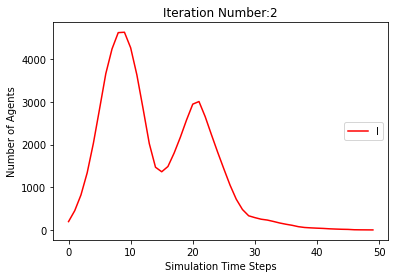

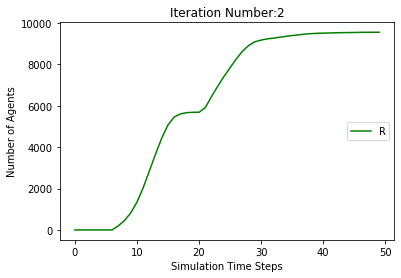

[9805, 9537, 9164, 8693, 8043, 7179, 6307, 5504, 4881, 4525, 4373, 4322, 4310, 4309, 4309, 4085, 3790, 3531, 3224, 2887, 2550, 2174, 1842, 1598, 1426, 1285, 1196, 1143, 1103, 1048, 973, 904, 854, 813, 787, 754, 736, 710, 691, 666, 650, 634, 621, 609, 601, 599, 596, 595, 594, 593, 591, 590, 589, 589, 588, 588, 588, 588, 588, 588, 588, 588]
[195, 463, 836, 1307, 1957, 2821, 3693, 4301, 4656, 4639, 4320, 3721, 2869, 1998, 1195, 796, 735, 842, 1098, 1423, 1759, 2135, 2243, 2192, 2105, 1939, 1691, 1407, 1071, 794, 625, 522, 431, 383, 356, 349, 312, 263, 213, 188, 163, 153, 133, 127, 109, 92, 70, 55, 40, 28, 18, 11, 10, 7, 7, 6, 5, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 463, 836, 1307, 1957, 2821, 3693, 4496, 5119, 5475, 5627, 5678, 5690, 5691, 5691, 5915, 6210, 6469, 6776, 7113, 7450, 7826, 8158, 8402, 8574, 8715, 8804, 8857, 8897, 8952, 9027, 9096, 9146, 9187, 9213, 9246, 9264, 9290, 9309, 9334, 9350, 9366, 9379, 9391, 9399, 9401, 9404, 9405, 9406, 9407, 9409, 9410, 9411, 9411, 9412]
[[

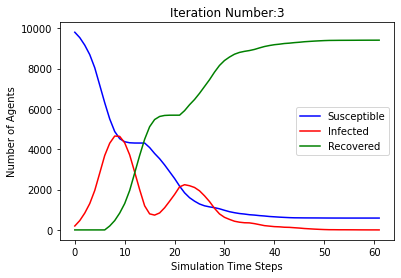

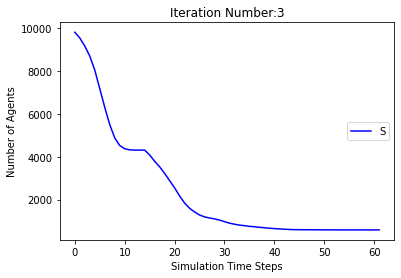

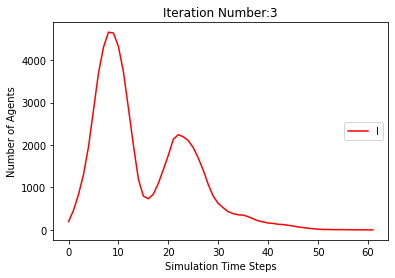

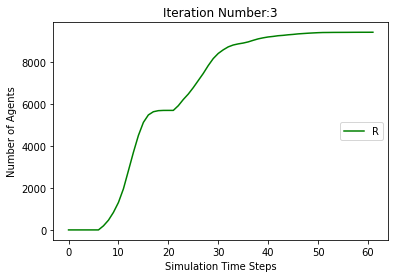

[9805, 9514, 9133, 8526, 7720, 6776, 5898, 5118, 4560, 4274, 4190, 4166, 4163, 4162, 4162, 4100, 4076, 4031, 3982, 3930, 3891, 3851, 3814, 3786, 3759, 3726, 3703, 3688, 3662, 3641, 3624, 3610, 3593, 3577, 3568, 3564, 3560, 3529, 3502, 3483, 3477, 3474, 3472, 3468, 3464, 3464, 3464, 3464, 3464, 3464, 3464, 3464]
[195, 486, 867, 1474, 2280, 3224, 4102, 4687, 4954, 4859, 4336, 3554, 2613, 1736, 956, 460, 198, 159, 184, 233, 271, 311, 286, 290, 272, 256, 227, 203, 189, 173, 162, 149, 133, 126, 120, 98, 81, 95, 108, 110, 100, 94, 92, 92, 65, 38, 19, 13, 10, 8, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 486, 867, 1474, 2280, 3224, 4102, 4882, 5440, 5726, 5810, 5834, 5837, 5838, 5838, 5900, 5924, 5969, 6018, 6070, 6109, 6149, 6186, 6214, 6241, 6274, 6297, 6312, 6338, 6359, 6376, 6390, 6407, 6423, 6432, 6436, 6440, 6471, 6498, 6517, 6523, 6526, 6528, 6532, 6536]
[[], [9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341, 3112, 2883, 2667, 2493, 2384,

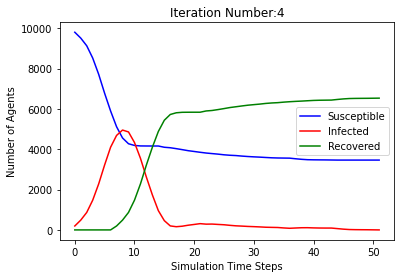

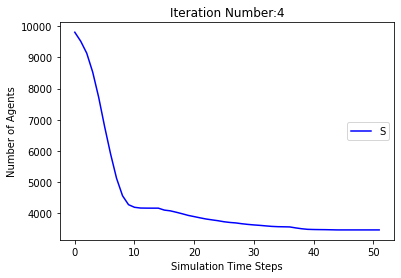

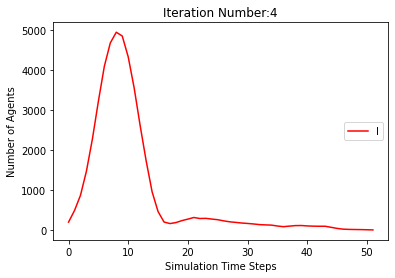

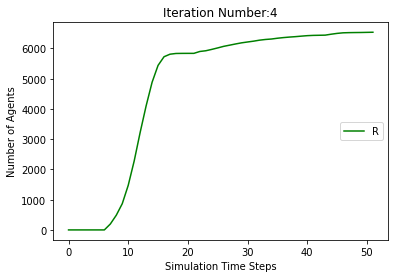

[9805, 9532, 9173, 8600, 7840, 6877, 5921, 5139, 4641, 4384, 4282, 4261, 4259, 4257, 4068, 3723, 3362, 3034, 2687, 2320, 1967, 1671, 1475, 1326, 1254, 1177, 1133, 1100, 1083, 1073, 1067, 1044, 1021, 1003, 992, 983, 970, 960, 953, 944, 940, 937, 931, 922, 920, 919, 918, 917, 917, 917, 917, 917, 916, 916, 916, 916, 916, 916, 916, 915, 915, 915, 915, 915, 915, 915, 915]
[195, 468, 827, 1400, 2160, 3123, 4079, 4666, 4891, 4789, 4318, 3579, 2618, 1664, 1071, 918, 1022, 1248, 1574, 1939, 2290, 2397, 2248, 2036, 1780, 1510, 1187, 867, 588, 402, 259, 210, 156, 130, 108, 100, 103, 107, 91, 77, 63, 55, 52, 48, 40, 34, 26, 23, 20, 14, 5, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 468, 827, 1400, 2160, 3123, 4079, 4861, 5359, 5616, 5718, 5739, 5741, 5743, 5932, 6277, 6638, 6966, 7313, 7680, 8033, 8329, 8525, 8674, 8746, 8823, 8867, 8900, 8917, 8927, 8933, 8956, 8979, 8997, 9008, 9017, 9030, 9040, 9047, 9056, 9060, 9063, 9069, 9078, 9080, 9081, 9082, 9083, 9083, 9083

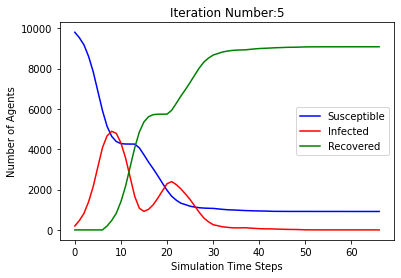

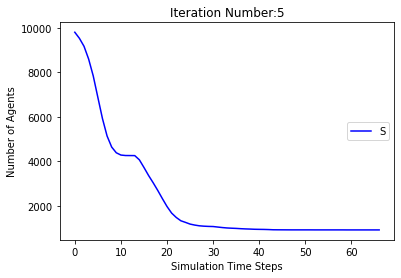

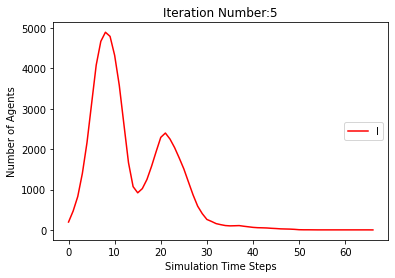

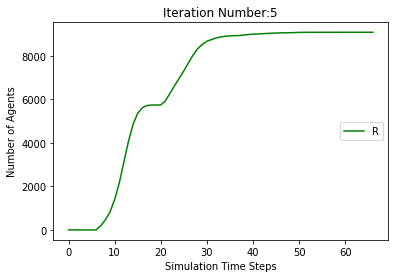

[9805, 9538, 9195, 8713, 8020, 7202, 6349, 5531, 4901, 4516, 4356, 4313, 4309, 4309, 4309, 4179, 3937, 3760, 3558, 3337, 3101, 2863, 2683, 2533, 2416, 2326, 2243, 2174, 2113, 2038, 1950, 1832, 1695, 1584, 1489, 1410, 1328, 1261, 1172, 1103, 1061, 994, 954, 915, 882, 850, 832, 820, 803, 789, 775, 764, 758, 753, 748, 745, 744, 742, 741, 741, 741, 741, 741, 741, 741, 741]
[195, 462, 805, 1287, 1980, 2798, 3651, 4274, 4637, 4679, 4357, 3707, 2893, 2040, 1222, 722, 579, 596, 755, 972, 1208, 1446, 1496, 1404, 1344, 1232, 1094, 927, 750, 645, 583, 584, 631, 659, 685, 703, 710, 689, 660, 592, 523, 495, 456, 413, 379, 322, 271, 241, 191, 165, 140, 118, 92, 79, 72, 58, 45, 33, 23, 17, 12, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 462, 805, 1287, 1980, 2798, 3651, 4469, 5099, 5484, 5644, 5687, 5691, 5691, 5691, 5821, 6063, 6240, 6442, 6663, 6899, 7137, 7317, 7467, 7584, 7674, 7757, 7826, 7887, 7962, 8050, 8168, 8305, 8416, 8511, 8590, 8672, 8739, 8828, 8897, 8939, 9006, 9046, 9085, 9118, 9150, 91

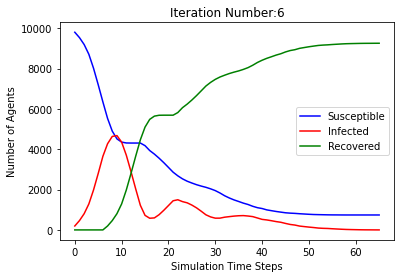

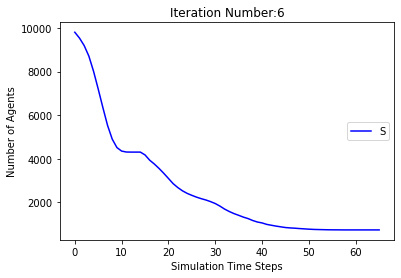

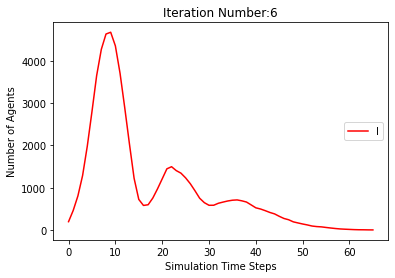

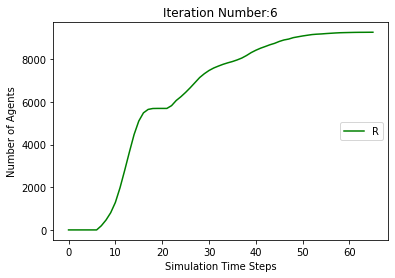

[9805, 9518, 9161, 8662, 7959, 7158, 6294, 5496, 4867, 4493, 4351, 4312, 4303, 4302, 4302, 3906, 3484, 3096, 2672, 2191, 1670, 1242, 932, 775, 662, 605, 560, 535, 490, 464, 449, 441, 435, 429, 421, 420, 417, 413, 406, 405, 405, 405, 405, 404, 403, 402, 402, 402, 402, 402, 402, 402, 402]
[195, 482, 839, 1338, 2041, 2842, 3706, 4309, 4651, 4668, 4311, 3647, 2855, 1992, 1194, 961, 1009, 1255, 1640, 2112, 2632, 3060, 2974, 2709, 2434, 2067, 1631, 1135, 752, 468, 326, 221, 170, 131, 114, 70, 47, 36, 35, 30, 24, 16, 15, 13, 10, 4, 3, 3, 3, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 482, 839, 1338, 2041, 2842, 3706, 4504, 5133, 5507, 5649, 5688, 5697, 5698, 5698, 6094, 6516, 6904, 7328, 7809, 8330, 8758, 9068, 9225, 9338, 9395, 9440, 9465, 9510, 9536, 9551, 9559, 9565, 9571, 9579, 9580, 9583, 9587, 9594, 9595, 9595, 9595, 9595, 9596, 9597, 9598]
[[], [9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341, 3112, 2883, 2667, 2493, 2384, 2311, 226

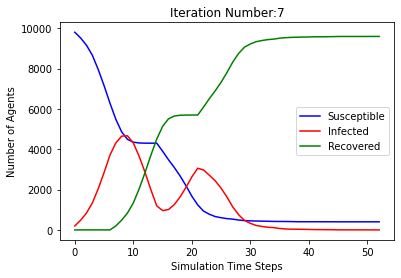

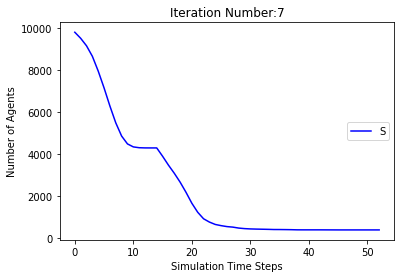

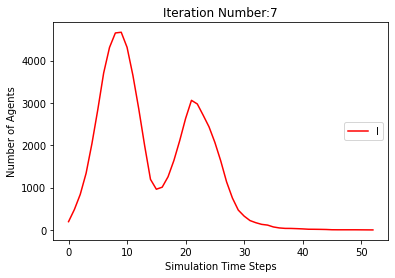

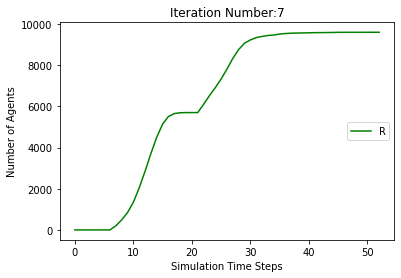

[9805, 9501, 9106, 8548, 7841, 7027, 6213, 5491, 4945, 4595, 4406, 4337, 4303, 4298, 3964, 3450, 2948, 2464, 1944, 1497, 1154, 903, 758, 666, 609, 553, 541, 507, 484, 467, 458, 453, 448, 443, 438, 434, 434, 431, 429, 425, 424, 423, 422, 419, 419, 418, 418, 418, 418, 418, 418, 418, 418]
[195, 499, 894, 1452, 2159, 2973, 3787, 4314, 4556, 4511, 4142, 3504, 2724, 1915, 1527, 1495, 1647, 1942, 2393, 2806, 3144, 3061, 2692, 2282, 1855, 1391, 956, 647, 419, 291, 208, 156, 105, 98, 69, 50, 33, 27, 24, 23, 19, 15, 12, 15, 12, 11, 7, 6, 5, 4, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 499, 894, 1452, 2159, 2973, 3787, 4509, 5055, 5405, 5594, 5663, 5697, 5702, 6036, 6550, 7052, 7536, 8056, 8503, 8846, 9097, 9242, 9334, 9391, 9447, 9459, 9493, 9516, 9533, 9542, 9547, 9552, 9557, 9562, 9566, 9566, 9569, 9571, 9575, 9576, 9577, 9578, 9581, 9581, 9582]
[[], [9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341, 3112, 2883, 2667, 2493, 2384, 2311, 2264, 

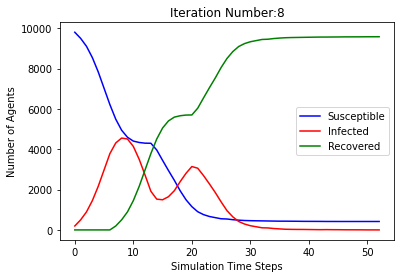

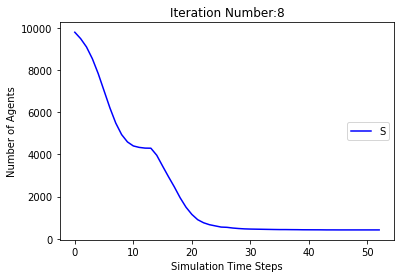

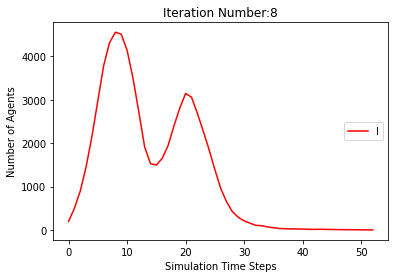

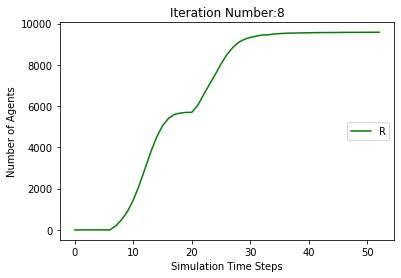

[9805, 9525, 9152, 8639, 7977, 7131, 6224, 5406, 4856, 4547, 4383, 4317, 4309, 4308, 4308, 3983, 3582, 3213, 2855, 2488, 2140, 1819, 1544, 1349, 1203, 1098, 1033, 951, 875, 808, 770, 745, 720, 690, 673, 655, 649, 643, 639, 635, 635, 632, 628, 625, 624, 623, 623, 622, 622, 622, 622, 622, 622, 622, 622]
[195, 475, 848, 1361, 2023, 2869, 3776, 4399, 4669, 4605, 4256, 3660, 2822, 1916, 1098, 873, 965, 1170, 1462, 1821, 2168, 2489, 2439, 2233, 2010, 1757, 1455, 1189, 944, 736, 579, 458, 378, 343, 278, 220, 159, 127, 106, 85, 55, 41, 27, 24, 19, 16, 12, 13, 10, 6, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 475, 848, 1361, 2023, 2869, 3776, 4594, 5144, 5453, 5617, 5683, 5691, 5692, 5692, 6017, 6418, 6787, 7145, 7512, 7860, 8181, 8456, 8651, 8797, 8902, 8967, 9049, 9125, 9192, 9230, 9255, 9280, 9310, 9327, 9345, 9351, 9357, 9361, 9365, 9365, 9368, 9372, 9375, 9376, 9377, 9377, 9378]
[[], [9805, 9538, 9193, 8713, 8064, 7213, 6296, 5437, 4819, 4456, 4325, 4301, 4298, 4298, 4130, 3863, 3597, 3341,

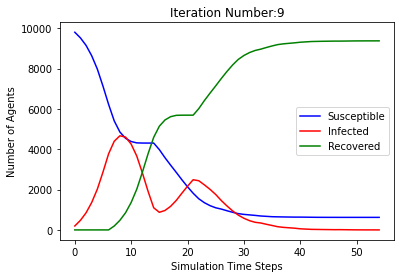

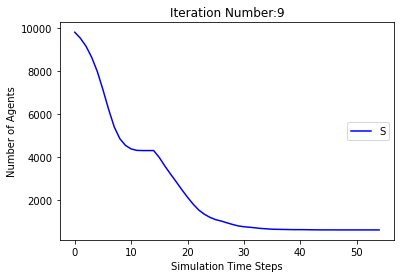

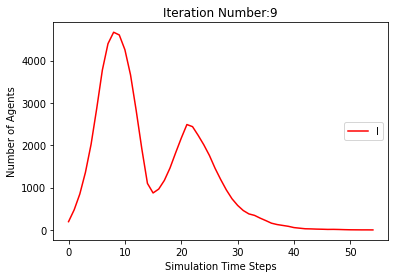

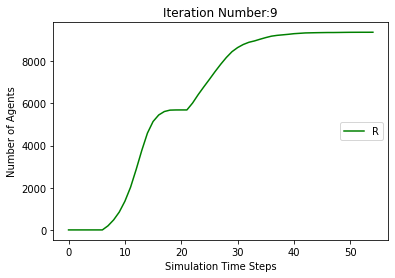

[9805, 9531, 9143, 8599, 7897, 7037, 6135, 5356, 4777, 4476, 4337, 4279, 4258, 4251, 4251, 4057, 3772, 3519, 3244, 2957, 2613, 2283, 1992, 1732, 1552, 1424, 1327, 1259, 1228, 1146, 1063, 1012, 972, 939, 902, 863, 836, 800, 773, 752, 728, 706, 692, 678, 669, 652, 644, 635, 630, 628, 625, 617, 611, 609, 607, 605, 605, 605, 604, 604, 604, 604, 604, 604, 604, 604]
[195, 469, 857, 1401, 2103, 2963, 3865, 4449, 4754, 4667, 4262, 3618, 2779, 1884, 1105, 720, 704, 818, 1035, 1301, 1638, 1968, 2065, 2040, 1967, 1820, 1630, 1354, 1055, 846, 669, 540, 452, 388, 357, 365, 310, 263, 239, 220, 211, 196, 171, 158, 131, 121, 108, 93, 76, 64, 53, 52, 41, 35, 28, 25, 23, 20, 13, 7, 5, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 195, 469, 857, 1401, 2103, 2963, 3865, 4644, 5223, 5524, 5663, 5721, 5742, 5749, 5749, 5943, 6228, 6481, 6756, 7043, 7387, 7717, 8008, 8268, 8448, 8576, 8673, 8741, 8772, 8854, 8937, 8988, 9028, 9061, 9098, 9137, 9164, 9200, 9227, 9248, 9272, 9294, 9308, 9322, 9331, 9348, 9356, 9365, 93

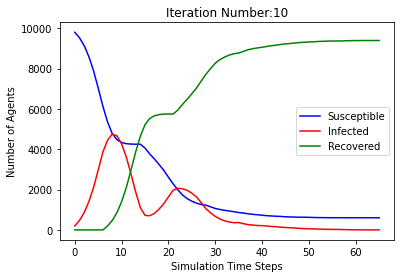

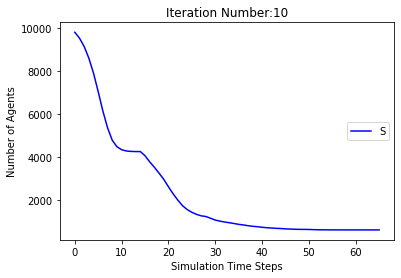

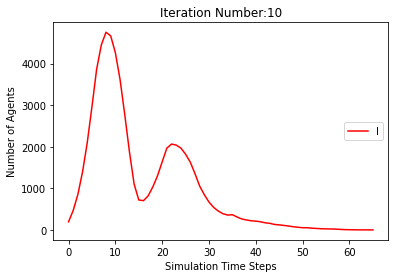

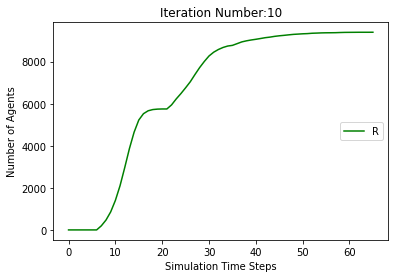

In [10]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

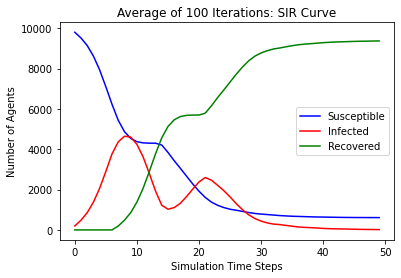

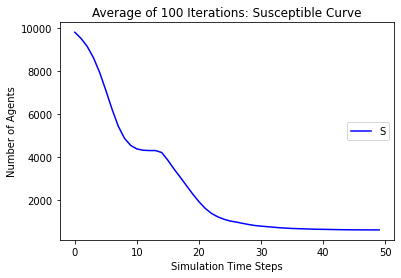

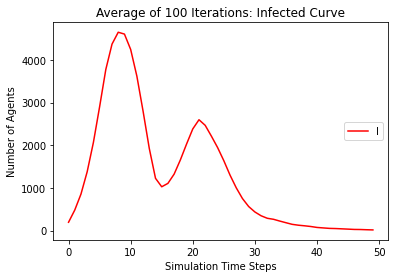

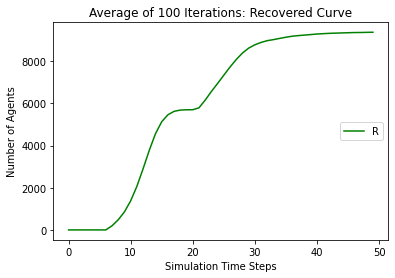

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
